# Capítulo 10: Modelagem Fuzzy em Python

>## Modelagem e Simulação de Sistemas Usando Lógica Fuzzy com Python: Teoria e Prática
>### Aurtor: Jorge Zavaleta

**Problema**: 

O coronavírus (COVID-19) é uma doença infecciosa causada por um novo vírus que causa problemas respiratórios semelhantes à gripe e sintomas como tosse, febre e, em casos mais graves, dificuldade para respirar. A principal forma de contágio do COVID19 é o contato com alguma pessoa infectada, que transmite o vírus por meio de tosse e espirros. Ele também se propaga quando a pessoa toca em uma superfície ou objeto contaminado e depois nos olhos, nariz ou boca. Como prevenção, lave as mãos com frequência e evite tocar o rosto e ter contato próximo (um metro de distância) com pessoas que não estejam bem. Por razões de simplicidade só serão usadas a Tosse e Febre como variáveis de entrada, no entanto, poder usar-se as outras.

In [1]:
# importando as bibliotecas 
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
%matplotlib inline

## Primeiro Passo

**Determinar as variáveis linguísticas para o sistema fuzzy: entrada (Tosse e Febre) e saída COVID-19**:

- Tosse = {Tosse Simples, Tosse Média,Tosse seca} = {TS,TM,TK}
- Febre = {Febre Simples, Febre Média, Febre Alta} = {FS,FM,FA}
- Covid-19 = {Resfrio Normal, Resfrio Severo, Resfrio Covid} = {RN,RS,CO}

## Segundo Passo

Determinar o **Universo de Discurso** para cada uma das variáveis linguísticas definidas no primeiro passo.

### Universo de Discurso - Tosse

In [2]:
# Universo Tosse = T[0,5] e seus conjuntos fuzzy
Ut = np.arange(0,5.1,0.1) # Ut = Universo da tosse
# gerando os conjuntos fuzzy
TS = fuzzy.trapmf(Ut,[0,0,1,3])
TM = fuzzy.trimf(Ut,[1,2.5,4])
TK = fuzzy.trapmf(Ut,[3,4,5,5])
#
Ut0 = np.zeros_like(Ut)

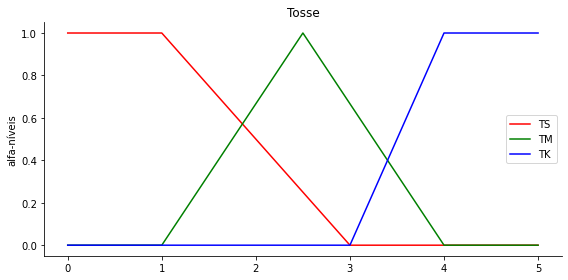

In [3]:
# gerando o gráfico para a Tosse
fig, To = plt.subplots(nrows=1, figsize=(8, 4))
To.plot(Ut, TS,'r',linewidth=1.5, label='TS')
#To.fill_between(Ut, Ut0, TS, facecolor='r', alpha=0.1)
To.plot(Ut, TM,'g',linewidth=1.5, label='TM')
#To.fill_between(Ut, Ut0, TM, facecolor='g', alpha=0.1)
To.plot(Ut, TK,'b',linewidth=1.5, label='TK')
#To.fill_between(Ut, Ut0, TK, facecolor='b', alpha=0.1)
#To.set_xlabel('Universo de discurso [0,5]')
To.set_ylabel('alfa-níveis')
To.set_title('Tosse')
To.legend()
#
# Turn off top/right axes
for ax in (To,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
plt.tight_layout()
# gravando a figura
#fig.savefig('tosse.png')

### Universo de Discurso - Febre

In [4]:
# Universo Febre = F[36,39]
Uf = np.arange(36,39.1,0.1) # Uf = Universo da febre
# gerando os conjuntos fuzzy
FS = fuzzy.trapmf(Uf,[36,36,36.5,37])
FM = fuzzy.trimf(Uf,[36.5,37,37.5])
FA = fuzzy.trapmf(Uf,[37,37.5,38.5,39])
# util 
Uf0 = np.zeros_like(Uf)

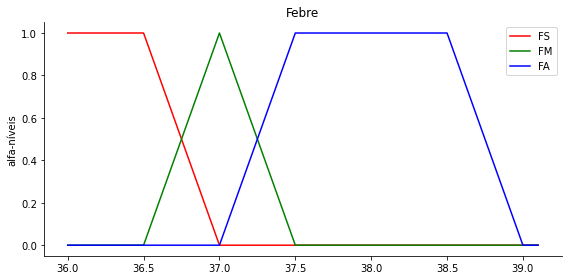

In [5]:
# gerando o gráfico para a Tosse
fig, Fe = plt.subplots(nrows=1, figsize=(8, 4))
#
Fe.plot(Uf, FS,'r',linewidth=1.5, label='FS')
#Fe.fill_between(Uf, Uf0, FS, facecolor='r', alpha=0.1)
Fe.plot(Uf, FM,'g',linewidth=1.5, label='FM')
#Fe.fill_between(Uf, Uf0, FM, facecolor='g', alpha=0.1)
Fe.plot(Uf, FA,'b',linewidth=1.5, label='FA')
#Fe.fill_between(Uf, Uf0, FA, facecolor='b', alpha=0.1)
Fe.set_ylabel('alfa-níveis')
Fe.set_title('Febre')
Fe.legend()
#
# Turn off top/right axes
for ax in (Fe,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
plt.tight_layout()
# gravando a figura
#fig.savefig('febre.png')

### Universo de Discurso - COVID-19

In [6]:
# Covid = C[0,5]
Uc = np.arange(0,5.1,0.1) # Uc = Universo da febre
#
RN = fuzzy.trapmf(Uc,[0,0,1,3])
RS = fuzzy.trimf(Uc,[2,3.5,4])
CO = fuzzy.trapmf(Uc,[3.5,4,5,5])
# util
Uc0 = np.zeros_like(Uc)

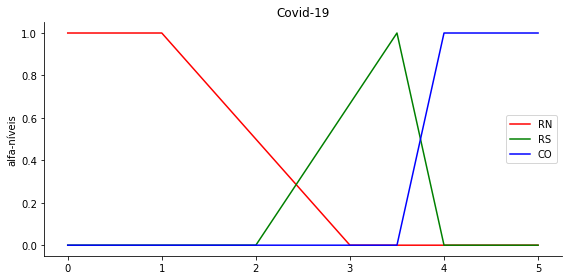

In [7]:
# gerando o gráfico para a Tosse
fig, Co = plt.subplots(nrows=1, figsize=(8, 4))
# RN
Co.plot(Uc, RN,'r',linewidth=1.5, label='RN')
#Co.fill_between(Uc, Uc0, RN, facecolor='r', alpha=0.1)
# RS
Co.plot(Uc, RS,'g',linewidth=1.5, label='RS')
#Co.fill_between(Uc, Uc0, RS, facecolor='g', alpha=0.1)
# CO
Co.plot(Uc, CO,'b',linewidth=1.5, label='CO')
#Co.fill_between(Uc, Uc0, CO, facecolor='b', alpha=0.1)
Co.set_ylabel('alfa-níveis')
Co.set_title('Covid-19')
Co.legend()

# Turn off top/right axes
for ax in (Co,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
# gravando a figura
#fig.savefig('covid.png')

### Combinação para um só Gráfico

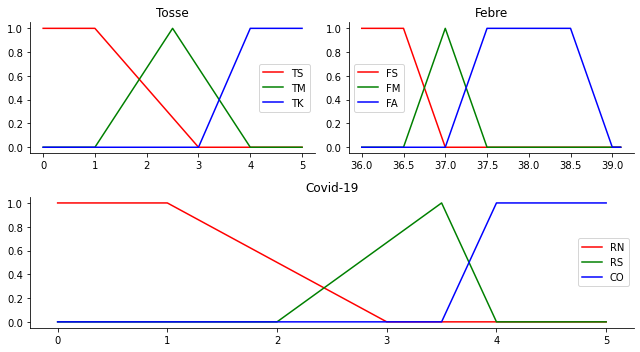

In [8]:
# Graficando os conjuntos fuzzy
#
fig = plt.figure(figsize=(9,5))
#
co = plt.subplot(212)
#cov.margins(0.05)
co.plot(Uc, RN,'r',linewidth=1.5, label='RN')
co.plot(Uc, RS,'g',linewidth=1.5, label='RS')
co.plot(Uc, CO,'b',linewidth=1.5, label='CO')
co.set_title('Covid-19')
co.legend()
#     
to = plt.subplot(221)
#Fe.margins(2,2)
to.plot(Ut, TS,'r',linewidth=1.5, label='TS')
to.plot(Ut, TM,'g',linewidth=1.5, label='TM')
to.plot(Ut, TK,'b',linewidth=1.5, label='TK')
to.set_title('Tosse')
to.legend()
#
fe = plt.subplot(222)
#Fe.margins(2,2)
fe.plot(Uf, FS,'r',linewidth=1.5, label='FS')
fe.plot(Uf, FM,'g',linewidth=1.5, label='FM')
fe.plot(Uf, FA,'b',linewidth=1.5, label='FA')
fe.set_title('Febre')
fe.legend()
#
# Turn off top/right axes
for ax in (co,to,fe):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
# Figure save
#fig.savefig('modelo.png')

## Construindo as regras de inferência fuzzy

### Regras

- R1: if Tosse is TS and Febre is FS then covid-19 is RN
- R2: if Tosse is TS and Febre is FM then covid-19 is RN
- R3: if Tosse is TS and Febre is FA then covid-19 is RS
- R4: if Tosse is TM and Febre is FS then covid-19 is RN
- R5: if Tosse is TM and Febre is FM then covid-19 is RS
- R6: if Tosse is TM and Febre is FA then covid-19 is CO
- R7: if Tosse is TK and Febre is FS then covid-19 is RS
- R8: if Tosse is TK and Febre is FM then covid-19 is CO
- R9: if Tosse is TK and Febre is FA then covid-19 is CO

In [9]:
## Antecedentes/consequentes
# functions
tosse = ctrl.Antecedent(Ut,'tosse')
#print(tosse)
febre = ctrl.Antecedent(Uf,'febre')
#print(febre)
covid = ctrl.Consequent(Uc,'covid')
#print(covid)

In [10]:
##
#names = ['nb', 'ns', 'ze', 'ps', 'pb']
names_t = ['ts','tm','tk']
names_f = ['fs','fm','fa']
names_c = ['rn','rs','co']
tosse.automf(5)
febre.automf(5)
covid.automf(5)

In [11]:
# unificando os valores dos conjuntos para as regras
tosse['ts'] = TS
tosse['tm'] = TM
tosse['tk'] = TK
#
febre['fs'] = FS
febre['fm'] = FM
febre['fa'] = FA
#
covid['rn'] = RN
covid['rs'] = RS
covid['co'] = CO

In [12]:
# regras
r1 = ctrl.Rule(tosse['ts'] and febre['fs'],covid['rn'])
r2 = ctrl.Rule(tosse['ts'] and febre['fm'],covid['rn'])
r3 = ctrl.Rule(tosse['ts'] and febre['fa'],covid['rs'])
r4 = ctrl.Rule(tosse['tm'] and febre['fs'],covid['rn'])
r5 = ctrl.Rule(tosse['tm'] and febre['fm'],covid['rs'])
r6 = ctrl.Rule(tosse['tm'] and febre['fa'],covid['co'])
r7 = ctrl.Rule(tosse['tk'] and febre['fs'],covid['rs'])
r8 = ctrl.Rule(tosse['tk'] and febre['fm'],covid['co'])
r9 = ctrl.Rule(tosse['tk'] and febre['fa'],covid['co'])

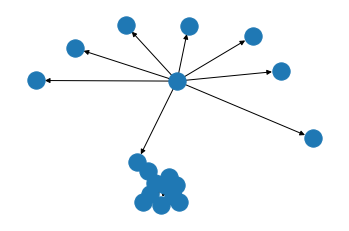

In [13]:
### Gráficos das regras: exemplo r2
r2.view();

## Criando o Sistema Fuzzy

In [14]:
# criando o sistema de controle
controle_covid = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r6,r7,r8,r9])

In [15]:
# criando o sistema de simulação : flush_after_run=21 * 21 + 1
sim_covid = ctrl.ControlSystemSimulation(controle_covid,flush_after_run=21 * 21 + 1)

In [16]:
#r1.antecedent = tosse['ts']
#
#sim_covid.input['ts'] = 2.5
#print(sim_covid.output['covid'])
#sim_covid.input['febre'] = 37.2
#sim_covid.compute()
#sim_covid.output['covid']
print('Este método não funciona!!!')

Este método não funciona!!!


### Para valores Fixos (tosse = 2.5, febre=37.2)

In [17]:
# Fixed values
t=2.5
tosse_level_ts = fuzzy.interp_membership(Ut, TS, 2.5)
tosse_level_tm = fuzzy.interp_membership(Ut, TM, 2.5)
tosse_level_tk = fuzzy.interp_membership(Ut, TK, 2.5)
# f= 37.5
febre_level_fs = fuzzy.interp_membership(Uf, FS, 37.2)
febre_level_fm = fuzzy.interp_membership(Uf, FM, 37.2)
febre_level_fa = fuzzy.interp_membership(Uf, FA, 37.2)
#
# covid-19
covid_rn = RN
covid_rs = RS
covid_co = CO

## Ativando as Regras

#### Regra 1

In [18]:
# activar regra 1
active_r1 = np.fmin(tosse_level_ts, febre_level_fs)
covid_activation_rn1 = np.fmin(active_r1, covid_rn)
print(covid_activation_rn1)
# util
Zeros = np.zeros_like(covid_activation_rn1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


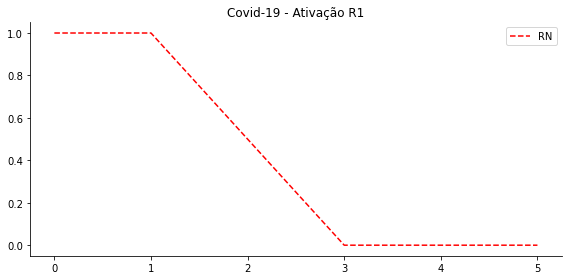

In [19]:
# Visualizar the graphic
fig, r1 = plt.subplots(figsize=(8, 4))
#
r1.fill_between(Uc, Zeros, covid_activation_rn1, facecolor='r', alpha=0.7)
r1.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
r1.set_title('Covid-19 - Ativação R1')
r1.legend()

# Turn off top/right axes
for ax in (r1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r1.png')

#### Regra 2

In [20]:
# activar regra 2
active_r2 = np.fmin(tosse_level_ts, febre_level_fm)
covid_activation_rn2 = np.fmin(active_r2, covid_rn)
print(covid_activation_rn2)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.2  0.15
 0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


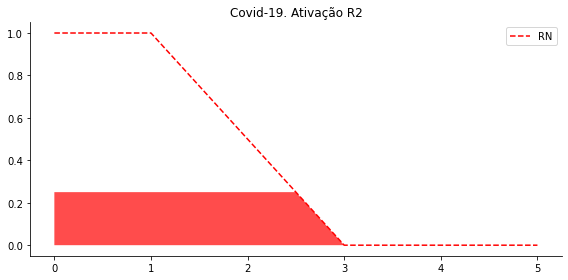

In [21]:
# Visualizar the graphic
fig, r2 = plt.subplots(figsize=(8, 4))
#
r2.fill_between(Uc, Zeros, covid_activation_rn2, facecolor='r', alpha=0.7)
r2.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
r2.set_title('Covid-19. Ativação R2')
r2.legend()

# Turn off top/right axes
for ax in (r2,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r2.png')

#### Regra 3

In [22]:
# activar regra 3
active_r3 = np.fmin(tosse_level_ts, febre_level_fa)
covid_activation_rs1 = np.fmin(active_r3, covid_rs)
print(covid_activation_rs1)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06666667 0.13333333 0.2
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.2        0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


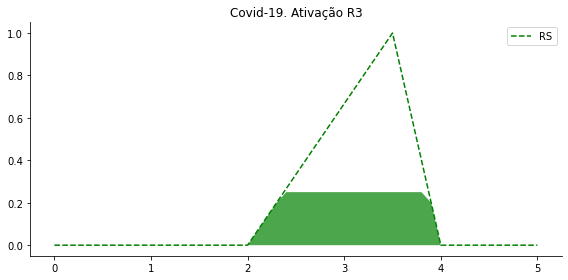

In [23]:
# Visualizar the graphic
fig, r3 = plt.subplots(figsize=(8, 4))
#
r3.fill_between(Uc, Zeros, covid_activation_rs1, facecolor='g', alpha=0.7)
r3.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
r3.set_title('Covid-19. Ativação R3')
r3.legend()

# Turn off top/right axes
for ax in (r3,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r3.png')

#### Regra 4

In [24]:
# activar regra 4
active_r4 = np.fmin(tosse_level_tm, febre_level_fs)
covid_activation_rn3 = np.fmin(active_r4, covid_rn)
print(covid_activation_rn3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


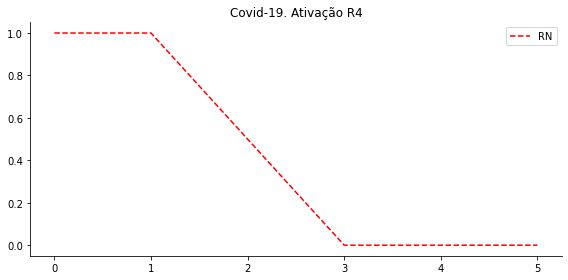

In [25]:
# Visualizar the graphic
fig, r4 = plt.subplots(figsize=(8, 4))
#
r4.fill_between(Uc, Zeros, covid_activation_rn3, facecolor='r', alpha=0.7)
r4.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
r4.set_title('Covid-19. Ativação R4')
r4.legend()

# Turn off top/right axes
for ax in (r4,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r4.png')

#### Regra 5

In [26]:
# activar regra 5
active_r5 = np.fmin(tosse_level_tm, febre_level_fm)
covid_activation_rs2 = np.fmin(active_r5, covid_rs)
print(covid_activation_rs2)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06666667 0.13333333 0.2
 0.26666667 0.33333333 0.4        0.46666667 0.53333333 0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.4        0.2        0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


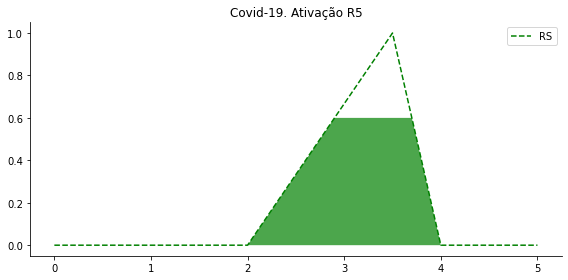

In [27]:
# Visualizar the graphic
fig, r5 = plt.subplots(figsize=(8, 4))
#
r5.fill_between(Uc, Zeros, covid_activation_rs2, facecolor='g', alpha=0.7)
r5.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
r5.set_title('Covid-19. Ativação R5')
r5.legend()

# Turn off top/right axes
for ax in (r5,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r5.png')

#### Regra 6

In [28]:
# activar regra 6
active_r6 = np.fmin(tosse_level_tm, febre_level_fa)
covid_activation_co1 = np.fmin(active_r6, covid_co)
print(covid_activation_co1)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.2 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]


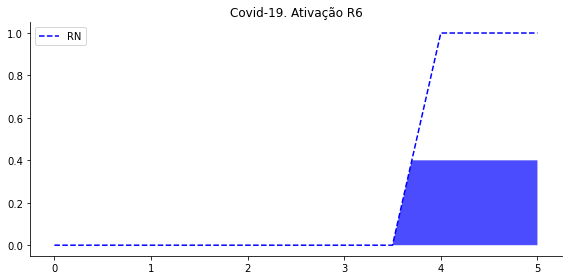

In [29]:
# Visualizar the graphic
fig, r6 = plt.subplots(figsize=(8, 4))
#
r6.fill_between(Uc, Zeros, covid_activation_co1, facecolor='b', alpha=0.7)
r6.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='RN')
r6.set_title('Covid-19. Ativação R6')
r6.legend()

# Turn off top/right axes
for ax in (r6,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r6.png')

#### Regra 7

In [30]:
# activar regra 7
active_r7 = np.fmin(tosse_level_tk, febre_level_fs)
covid_activation_rs3 = np.fmin(active_r7, covid_rs)
print(covid_activation_rs3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


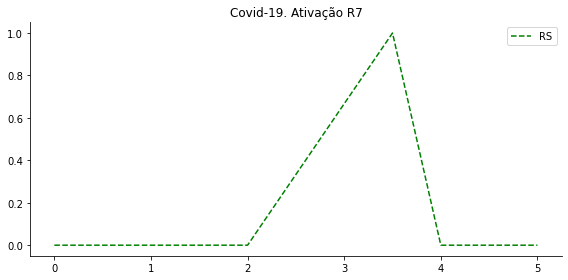

In [31]:
# Visualizar the graphic
fig, r7 = plt.subplots(figsize=(8, 4))
#
r7.fill_between(Uc, Zeros, covid_activation_rs3, facecolor='g', alpha=0.7)
r7.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
r7.set_title('Covid-19. Ativação R7')
r7.legend()

# Turn off top/right axes
for ax in (r7,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r7.png')

#### Regra 8

In [32]:
# activar regra 8
active_r8 = np.fmin(tosse_level_tk, febre_level_fm)
covid_activation_co2 = np.fmin(active_r8, covid_co)
print(covid_activation_co2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


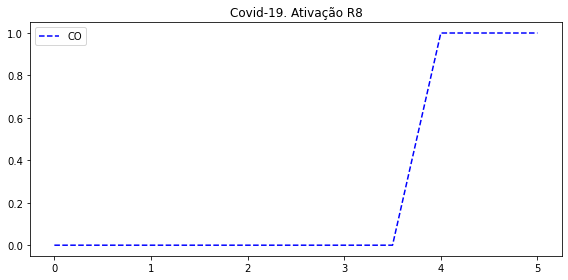

In [33]:
# Visualizar the graphic
fig, r8 = plt.subplots(figsize=(8, 4))
#
r8.fill_between(Uc, Zeros, covid_activation_co2, facecolor='b', alpha=0.7)
r8.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
r8.set_title('Covid-19. Ativação R8')
r8.legend()

# Turn off top/right axes
for ax in (r2,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r8.png')

#### Regra 9

In [34]:
# activar regra 9
active_r9 = np.fmin(tosse_level_tk, febre_level_fa)
covid_activation_co3 = np.fmin(active_r9, covid_co)
print(covid_activation_co3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


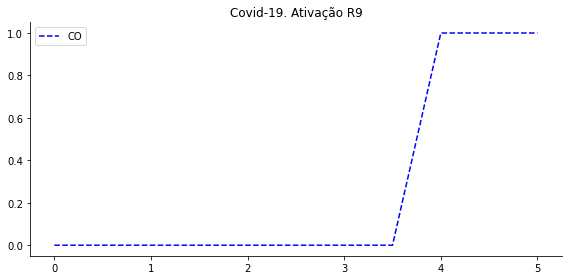

In [35]:
# Visualizar the graphic
fig, r9 = plt.subplots(figsize=(8, 4))
#
r9.fill_between(Uc, Zeros, covid_activation_co3, facecolor='b', alpha=0.7)
r9.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
r9.set_title('Covid-19. Ativação R9')
r9.legend()

# Turn off top/right axes
for ax in (r9,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('active_r9.png')

#### Gráfico das Regras Ativas

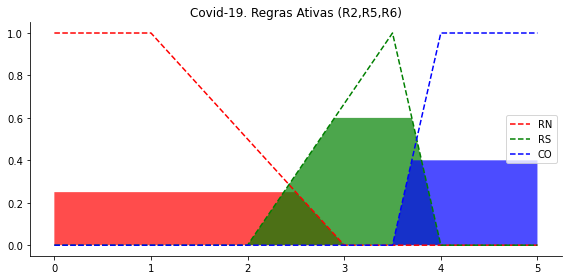

In [36]:
# Visualize this
fig, active_rules = plt.subplots(figsize=(8, 4))
#1
active_rules.fill_between(Uc, Zeros, covid_activation_rn2, facecolor='r', alpha=0.7)
active_rules.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
#2
active_rules.fill_between(Uc, Zeros, covid_activation_rs2, facecolor='g', alpha=0.7)
active_rules.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
#3
active_rules.fill_between(Uc, Zeros, covid_activation_co1, facecolor='b', alpha=0.7)
active_rules.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
#
active_rules.set_title('Covid-19. Regras Ativas (R2,R5,R6)')
active_rules.legend()

# Turn off top/right axes
for ax in (active_rules,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('regras_ativas.png')

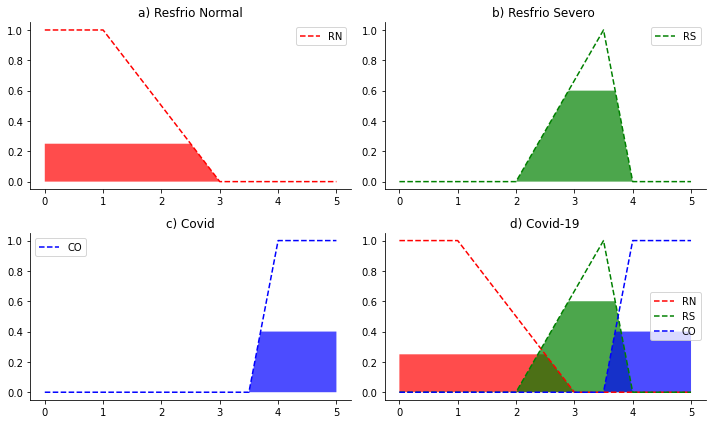

In [37]:
# gráficos. Subplots
fig, c = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
#
c[0,0].fill_between(Uc, Zeros, covid_activation_rn2, facecolor='r', alpha=0.7)
c[0,0].plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
c[0,0].set_title('a) Resfrio Normal')
c[0,0].legend()

# Turn off top/right axes
for ax in (c[0,0],):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
#fe = plt.subplot(222)
#
c[0,1].fill_between(Uc, Zeros, covid_activation_rs2, facecolor='g', alpha=0.7)
c[0,1].plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
c[0,1].set_title('b) Resfrio Severo ')
c[0,1].legend()

# Turn off top/right axes
for ax in (c[0,1],):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
c[1,0].fill_between(Uc, Zeros, covid_activation_co1, facecolor='b', alpha=0.7)
c[1,0].plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
c[1,0].set_title('c) Covid')
c[1,0].legend()

# Turn off top/right axes
for ax in (c[1,0],):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
#c[1,0].remove()
#
c[1,1].fill_between(Uc, Zeros, covid_activation_rn2, facecolor='r', alpha=0.7)
c[1,1].plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
#2
c[1,1].fill_between(Uc, Zeros, covid_activation_rs2, facecolor='g', alpha=0.7)
c[1,1].plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
#3
c[1,1].fill_between(Uc, Zeros, covid_activation_co1, facecolor='b', alpha=0.7)
c[1,1].plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
c[1,1].set_title('d) Covid-19')
c[1,1].legend()
#
# Turn off top/right axes
for ax in (c[1,1],):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#
#c[1,2].remove()
#
plt.tight_layout()
#fig.savefig('regras_activas_all.png')

## Defuzzificação Usando o Método do Centroide - COG

In [38]:
# gerando conjunto
aggregated = np.fmax(covid_activation_rs2,np.fmin(covid_activation_rn2, covid_activation_co1))
#
# Calculate defuzzified result y
y = fuzzy.defuzz(Uc, aggregated, 'centroid')
# Calcula o valor da altura de y
ay = fuzzy.interp_membership(Uc, aggregated, y)  # for plot

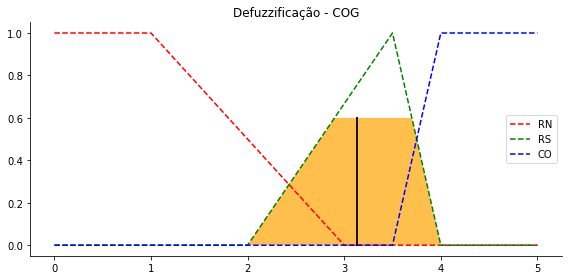

In [39]:
# Visualize this fifure
fig, cog = plt.subplots(figsize=(8, 4))
#
cog.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
cog.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
cog.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
cog.fill_between(Uc, Zeros, aggregated, facecolor='Orange', alpha=0.7)
cog.plot([y, y], [0, ay], 'k', linewidth=2.0, alpha=0.9)
cog.set_title('Defuzzificação - COG')
cog.legend()

# Turn off top/right axes
for ax in (cog,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('defuzz_cog.png')

In [40]:
# valores 
print('Valor fuzzy final:')
print('y = ',y)
#tip.view(sim=tipping)
print('Altura:',ay)

Valor fuzzy final:
y =  3.1285714285714272
Altura: 0.5999999999999943


## Defuzzificação Usando o Média do Máximos - MOM

In [41]:
# gerando conjunto
ag_mom = np.fmax(covid_activation_rs2,np.fmin(covid_activation_rn2, covid_activation_co1))
#
# Calculate defuzzified result y
y_mom = fuzzy.defuzz(Uc, ag_mom, 'mom')
# Calcula o valor da altura de y
aym = fuzzy.interp_membership(Uc, ag_mom, y)  # for plot

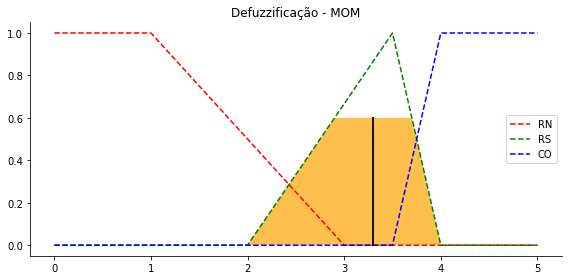

In [42]:
# Visualize this fifure
fig, mom = plt.subplots(figsize=(8, 4))
#
mom.plot(Uc, covid_rn, 'r', linewidth=1.5, linestyle='--',label='RN')
mom.plot(Uc, covid_rs, 'g', linewidth=1.5, linestyle='--',label='RS')
mom.plot(Uc, covid_co, 'b', linewidth=1.5, linestyle='--',label='CO')
mom.fill_between(Uc, Zeros, ag_mom, facecolor='Orange', alpha=0.7)
mom.plot([y_mom, y_mom], [0, aym], 'k', linewidth=2.0, alpha=0.9)
mom.set_title('Defuzzificação - MOM')
mom.legend()

# Turn off top/right axes
for ax in (mom,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#fig.savefig('defuzz_mom.png')

In [43]:
print('y:',y_mom)
#tip.view(sim=tipping)
print('y1:',aym)

y: 3.3
y1: 0.5999999999999943


---
Copyright © Jorge Zavaleta, 2023